In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



In [71]:
CALL_C = pd.read_csv('term-deposit-marketing-2020.csv')

In [72]:
#Checking data info
CALL_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [73]:
CALL_C.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [74]:
#Dropping uneccessary data
CALL_C.drop(['job' , 'contact', 'month'] , axis = 1 , inplace = True)

In [75]:
CALL_C.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,y
0,58,married,tertiary,no,2143,yes,no,5,261,1,no
1,44,single,secondary,no,29,yes,no,5,151,1,no
2,33,married,secondary,no,2,yes,yes,5,76,1,no
3,47,married,unknown,no,1506,yes,no,5,92,1,no
4,33,single,unknown,no,1,no,no,5,198,1,no


In [76]:
marital = pd.get_dummies(CALL_C['marital'], drop_first = True)
education = pd.get_dummies(CALL_C['education'])

In [77]:
default = pd.get_dummies(CALL_C['default'], drop_first = True)
housing = pd.get_dummies(CALL_C['housing'], drop_first = True)

In [78]:
loan = pd.get_dummies(CALL_C['loan'], drop_first = True)
y = pd.get_dummies(CALL_C['y'] , drop_first = True)

In [79]:
print(education)

       primary  secondary  tertiary  unknown
0        False      False      True    False
1        False       True     False    False
2        False       True     False    False
3        False      False     False     True
4        False      False     False     True
...        ...        ...       ...      ...
39995    False      False      True    False
39996    False      False      True    False
39997    False       True     False    False
39998    False      False      True    False
39999    False       True     False    False

[40000 rows x 4 columns]


In [80]:
CALL_C.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,y
0,58,married,tertiary,no,2143,yes,no,5,261,1,no
1,44,single,secondary,no,29,yes,no,5,151,1,no
2,33,married,secondary,no,2,yes,yes,5,76,1,no
3,47,married,unknown,no,1506,yes,no,5,92,1,no
4,33,single,unknown,no,1,no,no,5,198,1,no


In [81]:
CALL_C.drop(['marital' , 'education', 'default' , 'housing' , 'loan', 'y'] , axis = 1 , inplace = True)

In [82]:
CALL_C.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [83]:
CALL_C = pd.concat([CALL_C, marital, education, default, housing, loan, y], axis = 1)

In [84]:
CALL_C.head()

,age,balance,day,duration,campaign,married,single,primary,secondary,tertiary,unknown,yes,yes,yes,yes
0,58,2143,5,261,1,True,False,False,False,True,False,False,True,False,False
1,44,29,5,151,1,False,True,False,True,False,False,False,True,False,False
2,33,2,5,76,1,True,False,False,True,False,False,False,True,True,False
3,47,1506,5,92,1,True,False,False,False,False,True,False,True,False,False
4,33,1,5,198,1,False,True,False,False,False,True,False,False,False,False


In [85]:
#We don't really need it (If all three values are false, we know that it belongs to field 'Unknown')
CALL_C.drop(['unknown'] , axis = 1 , inplace = True)

In [86]:
CALL_C.head()

,age,balance,day,duration,campaign,married,single,primary,secondary,tertiary,yes,yes,yes,yes
0,58,2143,5,261,1,True,False,False,False,True,False,True,False,False
1,44,29,5,151,1,False,True,False,True,False,False,True,False,False
2,33,2,5,76,1,True,False,False,True,False,False,True,True,False
3,47,1506,5,92,1,True,False,False,False,False,False,True,False,False
4,33,1,5,198,1,False,True,False,False,False,False,False,False,False


In [87]:
#Changing column names
CALL_C.columns = ['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'married' , 'single' , 'primary' , 'secondary' , 
                  'tertiary' , 'default' , 'housing' , 'loan' , 'y' ]

In [88]:
CALL_C.head()

,age,balance,day,duration,campaign,married,single,primary,secondary,tertiary,default,housing,loan,y
0,58,2143,5,261,1,True,False,False,False,True,False,True,False,False
1,44,29,5,151,1,False,True,False,True,False,False,True,False,False
2,33,2,5,76,1,True,False,False,True,False,False,True,True,False
3,47,1506,5,92,1,True,False,False,False,False,False,True,False,False
4,33,1,5,198,1,False,True,False,False,False,False,False,False,False


In [89]:
CALL_C["married"] = CALL_C["married"].astype(int)
CALL_C["single"] = CALL_C["single"].astype(int)
CALL_C["primary"] = CALL_C["primary"].astype(int)
CALL_C["secondary"] = CALL_C["secondary"].astype(int)
CALL_C["tertiary"] = CALL_C["tertiary"].astype(int)
CALL_C["default"] = CALL_C["default"].astype(int)
CALL_C["housing"] = CALL_C["housing"].astype(int)
CALL_C["loan"] = CALL_C["loan"].astype(int)
CALL_C["y"] = CALL_C["y"].astype(int)

In [90]:
CALL_C.head()

,age,balance,day,duration,campaign,married,single,primary,secondary,tertiary,default,housing,loan,y
0,58,2143,5,261,1,1,0,0,0,1,0,1,0,0
1,44,29,5,151,1,0,1,0,1,0,0,1,0,0
2,33,2,5,76,1,1,0,0,1,0,0,1,1,0
3,47,1506,5,92,1,1,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,1,0,0,0,0,0,0,0


In [91]:
#features
X = CALL_C.drop(['y'], axis = 1)

In [92]:
#lables
y = CALL_C['y']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 101)

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train, y_train)
#predict_y = knn.predict(X_test)

KNeighborsClassifier()

In [29]:
y_predict = knn.predict(X_test)

In [30]:
print(classification_report(y_test , y_predict) , confusion_matrix(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7451
           1       0.45      0.24      0.31       549

    accuracy                           0.93      8000
   macro avg       0.70      0.61      0.64      8000
weighted avg       0.91      0.93      0.92      8000
 [[7292  159]
 [ 418  131]]


In [31]:
error_rate = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

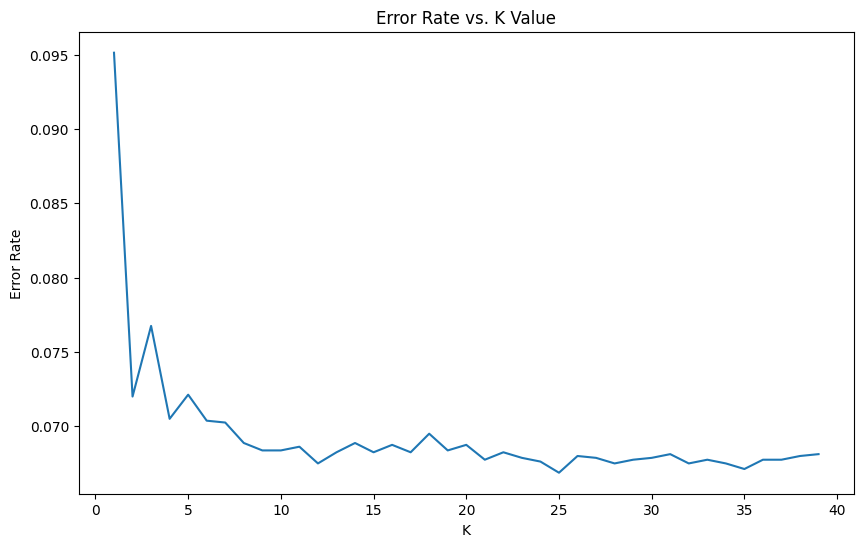

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
        
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
#GridSearch:

knn2 = KNeighborsClassifier(n_neighbors = 25)
param_grid = {}

In [34]:
grid_search = GridSearchCV(estimator = knn2, param_grid = param_grid, n_jobs = 1, cv = 5, scoring = "accuracy", error_score = 0)

In [35]:
grid_results = grid_search.fit(X_train, y_train)

In [36]:
#final model
final_model = knn2.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred) , confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7451
           1       0.53      0.24      0.33       549

    accuracy                           0.93      8000
   macro avg       0.74      0.61      0.65      8000
weighted avg       0.92      0.93      0.92      8000
 [[7335  116]
 [ 419  130]]


In [48]:
#Trying out Recursive Feature Elimination to filter out top contributing features based on weight given to it by the Model (rfc)

In [99]:
#Not using SelectKBest becuase correlation figures could throw some errors in attributes selection (since we have negative correclation values)

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier 

In [46]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Optimal number of features : {}'.format(rfecv.n_features_))

Optimal number of features : 10


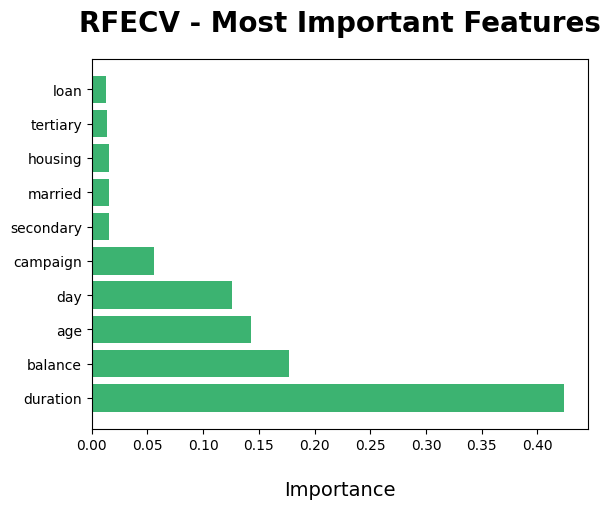

In [47]:
# List of top features: 
rfecv.estimator_.feature_importances_

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

SurveyOPT = pd.DataFrame()
SurveyOPT['attr'] = X.columns
SurveyOPT['importance'] = rfecv.estimator_.feature_importances_

SurveyOPT = SurveyOPT.sort_values(by='importance', ascending=False)

plt.barh(y=SurveyOPT['attr'], width=SurveyOPT['importance'], color='mediumseagreen')
plt.title('RFECV - Most Important Features', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [94]:
#Trying out SelectKbest and comparing results to RFE (THIS PART WORKS IF CODE IS EXECUTED UP UNTIL LINE 93)

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array

In [96]:
CALL_C.head()

,age,balance,day,duration,campaign,married,single,primary,secondary,tertiary,default,housing,loan,y
0,58,2143,5,261,1,1,0,0,0,1,0,1,0,0
1,44,29,5,151,1,0,1,0,1,0,0,1,0,0
2,33,2,5,76,1,1,0,0,1,0,0,1,1,0
3,47,1506,5,92,1,1,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,1,0,0,0,0,0,0,0


In [97]:
select = SelectKBest(f_classif, k=10)
X_significant = select.fit_transform(X_train, y_train)
filters = select.get_support()
features = X.keys()

In [98]:
print("All features", features)

print("Selected best 10:")
print(features[filters])

All features Index(['age', 'balance', 'day', 'duration', 'campaign', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'default', 'housing', 'loan'],
      dtype='object')
Selected best 10:
Index(['balance', 'duration', 'campaign', 'married', 'single', 'primary',
       'secondary', 'tertiary', 'housing', 'loan'],
      dtype='object')


In [ ]:
To Summarize:
1- It appears that BOTH feature selection models "RFE" & "SelectKbest" agrees in having "married" segment to be a better predictor
in deciding which customers are more willing to buy the product (ie: YES) more than "Single" customer segment ("married" coming
first in the list before "single" in terms of having a lower P value).

2- Comparing SelectKBest to RFE: Age and Day are not selected by SelectKbest as best predictors (substituted by single and 
primary) However, both models agrees up to 80% withe each other in TOP 10 contributing features and "married" segment importance